
# TP 7: Contornos
------------------------------------------
+ Objetivos: sobre la imagen de bloques encontrar los parámetros de área, perímetro, orientación y sus contornos.

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

#### Leemos la imagen

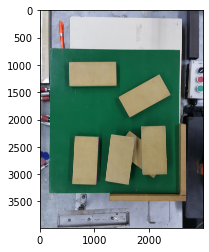

In [2]:
img = cv.imread('bloques1.jpg')
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure("Imagen original")
plt.imshow(imgRGB)
plt.show()

### Recorte
+ Definimos el field of view (fov) para centrarnos en el area donde se encuentran los bloques

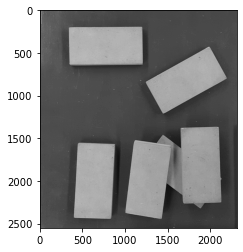

In [3]:
fov = imgRGB[750:3300,190:2500]
fov_gray=cv.cvtColor(fov, cv.COLOR_RGB2GRAY )

plt.figure("FOV")
plt.imshow(fov_gray,cmap='gray')
plt.show()

## Ecualizacion Histograma
+ Utilizamos una ecualizacion de histograma para tener una distribucion Gaussiana de grises sobre la imagen para difuminar la sombra

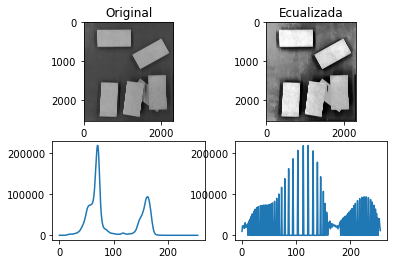

In [4]:
# Imagen original
plt.figure("Ecualizacion Histograma")

ax1=plt.subplot(221)
ax1.imshow(fov_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1,bins1 = np.histogram(fov_gray.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
img_eqzd = cv.equalizeHist(fov_gray)

ax2=plt.subplot(222)
ax2.imshow(img_eqzd, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Ecualizada')

hist2,bins2 = np.histogram(img_eqzd.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

## Filtro gaussiano
+ Aplicamos un filtro gaussiano a la imagen equalizada para suavizar y desenfocar la imagen

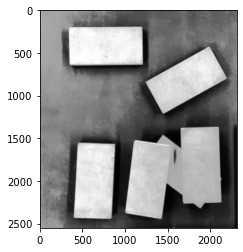

In [5]:
c = cv.GaussianBlur(img_eqzd,(17,17),5)

plt.figure("Gaussiana")
plt.imshow(c,cmap="gray")
plt.show()

## Binarizacion Umbral Fijo
+ Binarizamos la imagen para luego utilizar la funcion findContours que provee Open CV

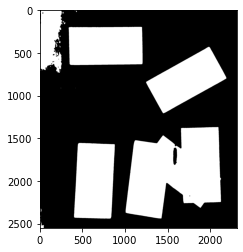

In [6]:
ret, img_bin = cv.threshold(c,160,255,cv.THRESH_BINARY)

plt.figure("Imagen Binarizada")
plt.imshow(img_bin,cmap='gray')
plt.show()

## Cierre
+ Aplicamos la operacion morfologica de cierre que consiste en una dilatacion seguida de una erosion. De esta manera, "cerramos" los objetos respetando su forma original y sus contornos.

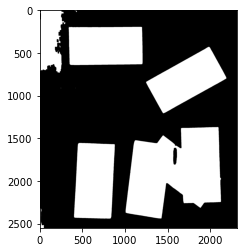

In [7]:
se = np.ones((25,15), np.uint8)
cierre = cv.morphologyEx(img_bin, cv.MORPH_CLOSE, se)

plt.figure("Cierre")
plt.imshow(cierre, cmap='gray')
plt.show()

## Contornos
+ Hallamos los contornos de la imagen y mostramos cuantos se han encontrado.

In [8]:
#Para la función findContours dependiendo de la versión de opencv utilizada desempaqueta 2 o 3 datos.
contours, hierarchy = cv.findContours(cierre, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

print("Cantidad de contornos encontrados: ", len(contours))

Cantidad de contornos encontrados:  13


+ Discriminamos los aquellos que encierran una área menor a 200000, puesto que no representan objetos de interés de ánalisis sino que ruido generado por el procesamiento de la imagen.

In [9]:
i=0
bloques = []

for cnt in contours:
    area = cv.contourArea(cnt)
    
    if area > 200000:
        print('i:{} Área: {}'.format(i, area))
        bloques.append(cnt)    
    
    i+=1

i:1 Área: 379577.5
i:2 Área: 856838.0
i:7 Área: 361516.5
i:9 Área: 376805.0


+ Dibujamos los contornos y denominamos los bloques sobre una copia de la imagen fov

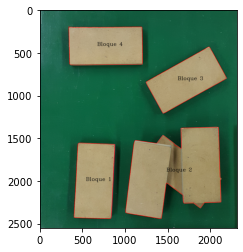

True

In [10]:
img_out1 = fov.copy()
i=1

for cnt in bloques:
    
    cv.drawContours(img_out1, [cnt], 0, (255,0,0), 3)
    
    # Ahora calculamos el centroide para utilizarlo de referencia para nombrar en la imagen los bloques
    M = cv.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    nombre = "Bloque " + str(i)
    
    cv.putText(img_out1, nombre, (cx-100, cy), cv.FONT_HERSHEY_COMPLEX, 2, 0,2)
    i+=1;

plt.figure("Imagen 1 contornos")
plt.imshow(img_out1)
plt.show()

img_out1RGB = cv.cvtColor(img_out1, cv.COLOR_BGR2RGB)
cv.imwrite("Imagen-Contornos1.jpg", img_out1RGB)

## Parametros
+ Perimetro
+ Area
+ Orientacion
+ Relación de aspecto (largo Vs. ancho)

In [13]:
i=1

for cnt in bloques:    
    # Perimetro
    p = cv.arcLength(cnt,False)
    
    # Area
    area = cv.contourArea(cnt)
    
    # Orientacion
    (x,y),(MA,ma),angle = cv.fitEllipse(cnt)
    
    # Relación de aspecto
    x,y,w,h = cv.boundingRect(cnt)
    aspect_ratio = float(w)/h
        
    print('Bloque {} | Perimetro: {} - Área: {} - Orientación: {} - R/Aspecto: {}'.format(i, p, area, angle, aspect_ratio))
    
    i+=1

Bloque 1 | Perimetro: 2638.06096303463 - Área: 379577.5 - Orientación: 3.3604276180267334 - R/Aspecto: 0.5401129943502825
Bloque 2 | Perimetro: 4866.311955451965 - Área: 856838.0 - Orientación: 67.25762176513672 - R/Aspecto: 1.0467289719626167
Bloque 3 | Perimetro: 2718.16894364357 - Área: 361516.5 - Orientación: 60.893497467041016 - R/Aspecto: 1.2107969151670952
Bloque 4 | Perimetro: 2619.1665205955505 - Área: 376805.0 - Orientación: 90.1519775390625 - R/Aspecto: 1.9013157894736843


## Conclusion 1:

Se logro marcar todos los bloques con la salvedad de que los bloques que conforman al "Bloque 2" se encuentran superpuestos por lo tanto se los considera como un único bloque. 

Respecto a los parametros obtenidos en los bloques 1, 3 y 4 se ve que sus caracteristicas geométricas (perímetro y área) son muy similares. 

Orientacion y relación de aspecto guardan una coherencia entre sí para todos los bloques, siendo:
+ Bloque 1: poseé una inclinación $\theta \approxeq 3°$ respecto a la vertical, dato que se reafirma en la R/aspecto donde $base = \frac{1}{2} alto$. Por lo tanto se verifica que el bloque se encuentra prácticamente vertical como se ve en la imagen.

Éste análisis es análogo para el bloque 4 donde se observa a diferencia del anterior que se encuentra horizontal.
Tanto para el conjunto de bloques "bloque 2" y bloque 3 se observa un grado de inclinación con mayor pronunciación hacia la posición horizontal.



***
# Método 2


+ Implementamos otra metodo de segmentacion que pueda resolver el problema de los bloques superpuestos. Para ello, utilizamos una ecualizacion de adaptacion local, que nos limita el contraste de la imagen tanto en oscuros y claros. Luego, procedemos de igual manera que el anterior.

## Clahe

In [14]:
plt.figure("Clahe")

#Imagen original
ax1=plt.subplot(221)
ax1.imshow(fov_gray, cmap="gray", vmin=0,vmax=255)
ax1.set_title("Original")

hist1,bins1=np.histogram(fov_gray.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

#Creamos un objeto CLAHE
clahe= cv.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
img_clahe = clahe.apply(fov_gray)
ax2=plt.subplot(222)
ax2.imshow(img_clahe, cmap="gray", vmin=0, vmax=255)

hist2,bins2=np.histogram(img_clahe.ravel(),256,[0,256])

ax4=plt.subplot(224)
ax4.plot(hist2)

In [15]:
# Filtro Gaussiano
c = cv.GaussianBlur(img_clahe,(17,17),5)

# Binarizacion
ret, img_bin = cv.threshold(c,145,255,cv.THRESH_BINARY)

plt.figure("Imagen Binarizada 2")
plt.imshow(img_bin, cmap = 'gray')
plt.show()

## Apertura

In [16]:
se = np.ones((15,10), np.uint8)
apertura = cv.morphologyEx(img_bin, cv.MORPH_OPEN, se)

contours, hierarchy = cv.findContours(apertura, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

print("Cantidad de contornos encontrados: ", len(contours))

plt.figure("Apertura")
plt.imshow(apertura, cmap='gray')
plt.show()

Cantidad de contornos encontrados:  40


In [17]:
i=0
img_out2 = fov.copy()
bloques = []

for cnt in contours:
    area = cv.contourArea(cnt)
    
    if area > 200000:
        print('i:{} Área: {}'.format(i, area))
        bloques.append(cnt)    
    
    i+=1

i:2 Área: 373241.5
i:6 Área: 372843.5
i:14 Área: 381162.5
i:36 Área: 357510.0
i:38 Área: 367205.0


In [19]:
img_out2 = fov.copy()
i=1

for cnt in bloques:
    
    cv.drawContours(img_out2, [cnt], 0, (255,0,0), 3)
    
    # Ahora calculamos el centroide para utilizarlo de referencia para nombrar en la imagen los bloques
    M = cv.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    nombre = "Bloque " + str(i)
    
    cv.putText(img_out2, nombre, (cx-100, cy), cv.FONT_HERSHEY_COMPLEX, 2, 0,2)
    i+=1;

plt.figure("Imagen 2 contornos")
plt.imshow(img_out2)
plt.show()

img_out2RGB = cv.cvtColor(img_out2, cv.COLOR_BGR2RGB)
cv.imwrite("Imagen-Contornos2.jpg", img_out2RGB)

True

In [20]:
i=1

for cnt in bloques:    
    # Perimetro
    p = cv.arcLength(cnt,False)
    
    # Area
    area = cv.contourArea(cnt)
    
    # Orientacion
    (x,y),(MA,ma),angle = cv.fitEllipse(cnt)
    
    # Relación de aspecto
    x,y,w,h = cv.boundingRect(cnt)
    aspect_ratio = float(w)/h
        
    print('Bloque {} | Perimetro: {} - Área: {} - Orientación: {} - R/Aspecto: {}'.format(i, p, area, angle, aspect_ratio))
    
    i+=1

Bloque 1 | Perimetro: 2624.8893901109695 - Área: 373241.5 - Orientación: 3.3417561054229736 - R/Aspecto: 0.5351473922902494
Bloque 2 | Perimetro: 2688.70266020298 - Área: 372843.5 - Orientación: 7.257686138153076 - R/Aspecto: 0.5822368421052632
Bloque 3 | Perimetro: 2884.595014691353 - Área: 381162.5 - Orientación: 178.9927215576172 - R/Aspecto: 0.52423900789177
Bloque 4 | Perimetro: 2693.9141104221344 - Área: 357510.0 - Orientación: 60.78794479370117 - R/Aspecto: 1.1994818652849741
Bloque 5 | Perimetro: 2579.5929267406464 - Área: 367205.0 - Orientación: 89.50909423828125 - R/Aspecto: 1.9568181818181818


## Conclusiones 2

Luego del procesamiento alternativo se logra la separación de los bloques superpuestos obviando el bloque tapado.
En cuanto a los parámetros se observan características geométricas similares entre todos los bloques, y todos guardan coherencia correspondiente entre orientación y R/aspecto.

# Análisis de Resultados y conclusiones globales
***
 + Finalmente con ambos procesamientos obtenemos resultados similares y coherentes para los bloques sin superposición. Para estos últimos se han planteado dos soluciones, donde la primera considera los tres juntos de manera en la que no se pierde información de los objetos de interés, y en la segunda se puede analizar con mayor independencia los bloques pero suprimiendo el bloque de abajo y con ciertas irregularidades sobre el extremo inferior del bloque 3